<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

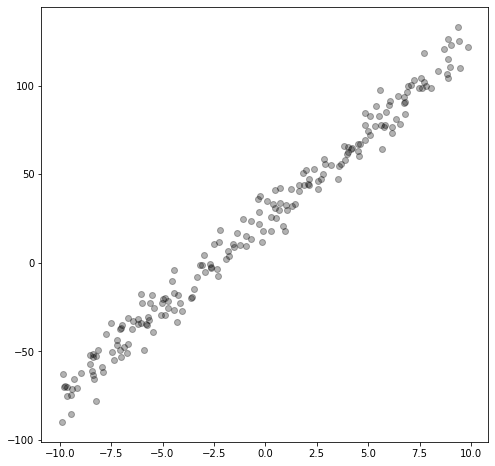

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# 1.Input Points
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3)
plt.show()

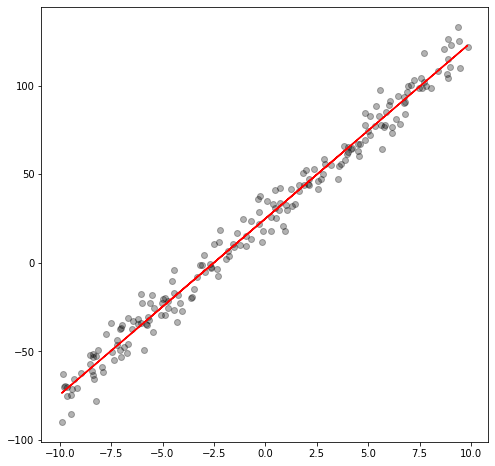

In [78]:
# 2.linear Regression Result
x = x_data
y = y_data

denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum()) / denominator
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y)) / denominator

y_hat = a * x + b

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3)
plt.plot(x, y_hat, color = 'r')
plt.show()

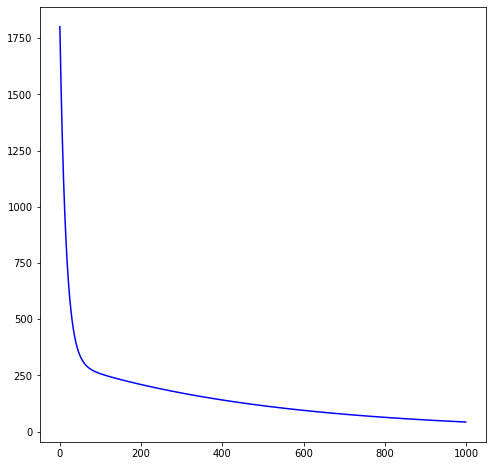

In [79]:
# 3.Plot The Energy Surface

theta_0 = 0
theta_1 = 0
alpha = 0.001   
n = 1000   
m = len(x_data)

temp_j = []
temp_theta_0 = []  
temp_theta_1 = []

for iteration in range(n):
  h = theta_0 + theta_1 * x     
  j = (1 / (2 * m)) * sum((h - y_hat) ** 2) 
  temp_j.append(j)

  theta_0 = theta_0 - alpha * (1 / m) * sum(h - y_hat)
  temp_theta_0.append(theta_0)
  theta_1 = theta_1 - alpha * (1 / m) * sum((h - y_hat) * x)
  temp_theta_1.append(theta_1)

plt.figure(figsize=(8, 8))
plt.plot(temp_j, "b")
plt.show()

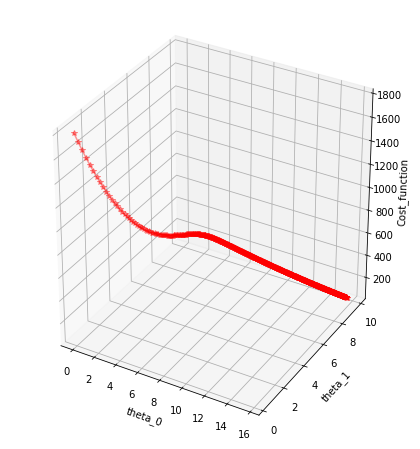

In [80]:
# 4.Plot The Gradient Descent Path On The Energy Surface

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(temp_theta_0, temp_theta_1, temp_j, marker = '*', color = 'r', alpha = 0.4)

ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost_function')
plt.show()